#                                                              MScFE Capstone Project



**Research Track**:    Chrispen Michael Mushore - (chrispenmushore@gmail.com)


**Practical (Code)**:     Moselane Peea – (peeamoselane@yahoo.com)



### Emerging Markets: Which financial ratios are best in identifying good buys?

Group: **34**
May 2020

### Problem statement
Investors are always looking for ways to determine the best stocks for a portfolio. There is always a question of whether the same methods of stocks selection applied in developed markets. Can the financial ratios utilised for developed markets hold the same significance in the emerging markets.
Considering the market imperfections, barriers to entry, government regulation, political risk and differences in financial reporting and other impediments in emerging markets, there is need to explore the necessity or lack of it to deviate from the normal methods that work in developed markets.
This can be addressed by investigating the financial ratios and techniques that actually work for identifying good buy in emerging markets.


***Ten Emerging companies we are going to use***

China Construction Bank Corporation (CICHY)
    
China Minsheng Banking Corp., Ltd. (1988.HK)

China Petroleum & Chemical Corporation (SNP)

China Life Insurance Company Limited (LFC)

CHINA MERCHANTS BANK CO LTD (CIHKY)

AGRICULTURAL BANK OF CHINA (ACGBY)

BANK OF CHINA LTD (BACHY)

INDUSTRIAL & COMMERCIAL BK OF CHINA (IDCBY)

PING AN INSURANCE(GROUP)CO.OF CHINA (PNGAY)

China Telecom Corp Ltd (CHA)

## Collecting stock prices

In [1]:
#import packages we need
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
#Loading all the company prices dowloaded
data = pd.read_csv("CICHY.csv")
data = pd.read_csv("1988.HK.csv")
data = pd.read_csv("SNP.csv")
data = pd.read_csv("LFC.csv")
data = pd.read_csv("CIHKY.csv")
data = pd.read_csv("ACGBY.csv")
data = pd.read_csv("BACHY.csv")
data = pd.read_csv("IDCBY.csv")
data = pd.read_csv("PNGAY.csv")
data = pd.read_csv("CHA.csv")

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-12,71.180000,71.540001,71.029999,71.519997,62.479401,77300
1,2015-05-13,73.150002,73.349998,72.589996,72.739998,63.545177,333000
2,2015-05-14,71.910004,71.910004,71.150002,71.190002,62.191116,113500
3,2015-05-15,73.849998,74.419998,73.650002,74.250000,64.864311,47800
4,2015-05-18,71.970001,71.980003,71.010002,71.220001,62.217327,113000


## Collecting Financial Statements

1. Income Statements

2. Cash Flow Statements

3. Balance Sheet

In [13]:
import requests
import json
import pandas as pd

In [14]:
from bs4 import BeautifulSoup
import urllib.request as ur

**Processing**

Here is a simple trick you can flexibly adjust the stock symbol and plug it into the URL link. 
It will come in handy later if you want to extract hundreds of company’s financial statements.

In [15]:
# Enter a stock symbol
index = "CICHY"

# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index + '/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

open the link and read it into a proper format called lxml. Simple enough.

In [16]:
read_data = ur.urlopen(url_is).read() 
soup_is= BeautifulSoup(read_data,'lxml')

In [17]:
soup_is

<!DOCTYPE html>
<html class="NoJs featurephone" id="atomic" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>CHINA CONSTRUCTION BANK (CICHY) Income Statement - Yahoo Finance</title><meta content="income statement,gross profit,revenue,operating expenses,operating income,net income,earning,earning per share" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="90376669494" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Get the detailed quarterly/annual income statement for CHINA CONSTRUCTION BANK (CICHY). Find out the revenue, expenses and profit or loss over the last fiscal year." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><me

**Data Manipulation**

But how do know which classes the relevant data are stored in?
After a few searches, we know that they are stored in“div”, we can create an empty list 
and use a for loop to find all elements and append them to the list.

In [18]:
ls= [] # Create empty list
for l in soup_is.find_all('div'): 
  #Find all data structure that is ‘div’
  ls.append(l.string) # add each element one by one to the list
 
ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns

In [20]:
new_ls = list(filter(None,ls))
new_ls

[' react-empty: 6 ',
 "No matching results for ''",
 'Tip: Try a valid symbol or a specific company name for relevant results',
 'Cancel',
 ' react-empty: 2 ',
 ' react-empty: 2 ',
 'CICHY - China Construction Bank Corporation',
 'Other OTC - Other OTC Delayed Price. Currency in USD',
 'Income Statement',
 'Balance Sheet',
 'Cash Flow',
 'Annual',
 'Quarterly',
 'Expand All',
 'ttm',
 '12/31/2019',
 '12/31/2018',
 '12/31/2017',
 '12/31/2016',
 '727,693,000',
 '705,380,000',
 '658,751,000',
 '621,498,000',
 '605,021,000',
 'Income from Associates & Other Participating Interests',
 '265,000',
 '249,000',
 '140,000',
 '161,000',
 '69,000',
 '-169,093,000',
 '-163,521,000',
 '-150,988,000',
 '-127,362,000',
 '-93,204,000',
 'Other Non Operating Income Expenses',
 '-401,000',
 '-357,000',
 '-354,000',
 '1,601,000',
 '2,821,000',
 'Pretax Income',
 '329,126,000',
 '326,597,000',
 '308,160,000',
 '299,787,000',
 '295,210,000',
 'Tax Provision',
 '56,848,000',
 '57,375,000',
 '52,534,000',
 '5

In [21]:
new_ls = new_ls[12:]

Well, now we have a list. But how do we turn it into a data frame? First, we need to iterate 6 
items at a time and store them in tuples. However, 
we want a list so that the pandas library can read it into a data frame

In [22]:
is_data = list(zip(*[iter(new_ls)]*6))
is_data

[('Quarterly', 'Expand All', 'ttm', '12/31/2019', '12/31/2018', '12/31/2017'),
 ('12/31/2016',
  '727,693,000',
  '705,380,000',
  '658,751,000',
  '621,498,000',
  '605,021,000'),
 ('Income from Associates & Other Participating Interests',
  '265,000',
  '249,000',
  '140,000',
  '161,000',
  '69,000'),
 ('-169,093,000',
  '-163,521,000',
  '-150,988,000',
  '-127,362,000',
  '-93,204,000',
  'Other Non Operating Income Expenses'),
 ('-401,000',
  '-357,000',
  '-354,000',
  '1,601,000',
  '2,821,000',
  'Pretax Income'),
 ('329,126,000',
  '326,597,000',
  '308,160,000',
  '299,787,000',
  '295,210,000',
  'Tax Provision'),
 ('56,848,000',
  '57,375,000',
  '52,534,000',
  '56,172,000',
  '62,821,000',
  '270,672,000'),
 ('266,733,000',
  '254,655,000',
  '242,264,000',
  '231,460,000',
  'Basic EPS',
  '-'),
 ('0.021', '0.02', '0.0192', '0.0184', 'Diluted EPS', '-'),
 ('0.021', '0.02', '0.0192', '0.0184', 'Basic Average Shares', '-'),
 ('12,701,571',
  '12,732,750',
  '12,617,917',


Perfect, that is exactly what we want. Now, we just have to read it into a data frame

In [23]:
Income_st = pd.DataFrame(is_data[0:])
Income_st

,0,1,2,3,4,5
0,Quarterly,Expand All,ttm,12/31/2019,12/31/2018,12/31/2017
1,12/31/2016,"727,693,000","705,380,000","658,751,000","621,498,000","605,021,000"
2,Income from Associates & Other Participating I...,"265,000","249,000","140,000","161,000","69,000"
3,"-169,093,000","-163,521,000","-150,988,000","-127,362,000","-93,204,000",Other Non Operating Income Expenses
4,"-401,000","-357,000","-354,000","1,601,000","2,821,000",Pretax Income
5,"329,126,000","326,597,000","308,160,000","299,787,000","295,210,000",Tax Provision
6,"56,848,000","57,375,000","52,534,000","56,172,000","62,821,000","270,672,000"
7,"266,733,000","254,655,000","242,264,000","231,460,000",Basic EPS,-
8,0.021,0.02,0.0192,0.0184,Diluted EPS,-
9,0.021,0.02,0.0192,0.0184,Basic Average Shares,-


### Data Cleaning
we are almost done. We just need to read the first row as the column and the 
first column as the row index. Here are some clean-up.

In [26]:
Income_st.columns = Income_st.iloc[0] # Name columns to first row of dataframe

Income_st = Income_st.iloc[1:,] # start to read 1st row

Income_st = Income_st.T # transpose dataframe

Income_st.columns = Income_st.iloc[0] #Name columns to first row of dataframe

Income_st.drop(Income_st.index[0],inplace=True) #Drop first index row

Income_st.index.name = '' # Remove the index name

Income_st.rename(index={'ttm': '12/31/2019'},inplace=True) #Rename ttm in index columns to end of the year

Income_st = Income_st[Income_st.columns[:-5]] # remove last 5 irrelevant columns

### Income Statement

In [25]:
Income_st

Quarterly,12/31/2016,Income from Associates & Other Participating Interests,"-169,093,000","-401,000","329,126,000","56,848,000","266,733,000","266,733,000","266,733,000",0.021,0.021,0.021,0.021,"12,701,571","12,701,571","12,701,571","12,701,571","266,733,000","266,733,000","266,733,000"
,,,,,,,,,,,,,,,,,,,,
Expand All,"727,693,000","265,000","-163,521,000","-357,000","326,597,000","57,375,000","254,655,000","254,655,000","254,655,000",0.02,0.02,0.02,0.02,"12,732,750","12,732,750","12,732,750","12,732,750","254,655,000","254,655,000","254,655,000"
12/31/2019,"705,380,000","249,000","-150,988,000","-354,000","308,160,000","52,534,000","242,264,000","242,264,000","242,264,000",0.0192,0.0192,0.0192,0.0192,"12,617,917","12,617,917","12,617,917","12,617,917","242,264,000","242,264,000","242,264,000"
12/31/2019,"658,751,000","140,000","-127,362,000","1,601,000","299,787,000","56,172,000","231,460,000","231,460,000","231,460,000",0.0184,0.0184,0.0184,0.0184,"12,579,348","12,579,348","12,579,348","12,579,348","231,460,000","231,460,000","231,460,000"
12/31/2018,"621,498,000","161,000","-93,204,000","2,821,000","295,210,000","62,821,000",Basic EPS,Normalized Income,Total Unusual Items Excluding Goodwill,Diluted EPS,Basic Average Shares,Diluted EPS,Basic Average Shares,Diluted Average Shares,Net Income from Continuing & Discontinued Oper...,Diluted Average Shares,Net Income from Continuing & Discontinued Oper...,Basic EPS,Normalized Income,Total Unusual Items Excluding Goodwill
12/31/2017,"605,021,000","69,000",Other Non Operating Income Expenses,Pretax Income,Tax Provision,"270,672,000",-,"410,558,560","-169,093,000",-,-,-,-,-,"270,672,000",-,"270,672,000",-,"410,558,560","-169,093,000"


## Computing Financial Ratios 

In [29]:
# Get company ratios using request package
company = 'data'   
financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{company}")
financial_ratios = financial_ratios.json()

In [30]:
ratios = financial_ratios['ratios'][0]
ratios

{'date': '2018-12-31',
 'investmentValuationRatios': {'priceBookValueRatio': '10.388665735976756',
  'priceToBookRatio': '10.388665735976756',
  'priceToSalesRatio': '9.113928707441541',
  'priceEarningsRatio': '-136.67604371641443',
  'receivablesTurnover': '4.89425280539517',
  'priceToFreeCashFlowsRatio': '78.43423284916202',
  'priceToOperatingCashFlowsRatio': '68.06766664942856',
  'priceCashFlowRatio': '68.06766664942856',
  'priceEarningsToGrowthRatio': '60.86341261249599',
  'priceSalesRatio': '9.113928707441541',
  'dividendYield': '-0',
  'enterpriseValueMultiple': '-183.33419369185722',
  'priceFairValue': '10.388665735976756'},
 'profitabilityIndicatorRatios': {'ebitperRevenue': '-0.07768108766852007',
  'ebtperEBIT': '0.8008668620263178',
  'niperEBT': '1.071858870014052',
  'grossProfitMargin': '0.8765536390641121',
  'operatingProfitMargin': '-0.07768108766852007',
  'pretaxProfitMargin': '-0.06221220891987896',
  'netProfitMargin': '-0.06668270795393957',
  'effectiveTa

In [31]:
profit_ratios = ratios['profitabilityIndicatorRatios']
profit_ratios

{'ebitperRevenue': '-0.07768108766852007',
 'ebtperEBIT': '0.8008668620263178',
 'niperEBT': '1.071858870014052',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

In [32]:
# Create a function that will get profit ratios when given a stock 
def get_profit_ratios(stock):
    financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{stock}")
    financial_ratios = financial_ratios.json()
    ratios = financial_ratios['ratios'][0]
    profit_ratios = ratios['profitabilityIndicatorRatios']
    
    return profit_ratios

In [33]:
# Check the function works
get_profit_ratios('data')

{'ebitperRevenue': '-0.07768108766852007',
 'ebtperEBIT': '0.8008668620263178',
 'niperEBT': '1.071858870014052',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

In [34]:
cash_flow = ratios['cashFlowIndicatorRatios']
cash_flow

{'operatingCashFlowPerShare': '1.8721076580501501',
 'freeCashFlowPerShare': '1.624673250072611',
 'cashPerShare': '12.372652241262465',
 'payoutRatio': '-0.0',
 'receivablesTurnover': '4.89425280539517',
 'operatingCashFlowSalesRatio': '0.1338951246027185',
 'freeCashFlowOperatingCashFlowRatio': '0.8678311009980866',
 'cashFlowCoverageRatios': '',
 'shortTermCoverageRatios': '9.487059977922238',
 'capitalExpenditureCoverageRatios': '7.566076494179791',
 'dividendpaidAndCapexCoverageRatios': '7.5660764941798',
 'dividendPayoutRatio': ''}

In [35]:
# Create a function that will get cash flow ratios when given a stock 
def get_cashflow_ratios(stock):
    financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{stock}")
    financial_ratios = financial_ratios.json()
    ratios = financial_ratios['ratios'][0]
    cash_flow = ratios['cashFlowIndicatorRatios']
    
    return profit_ratios

In [36]:
# Check the function works
get_cashflow_ratios('data')

{'ebitperRevenue': '-0.07768108766852007',
 'ebtperEBIT': '0.8008668620263178',
 'niperEBT': '1.071858870014052',
 'grossProfitMargin': '0.8765536390641121',
 'operatingProfitMargin': '-0.07768108766852007',
 'pretaxProfitMargin': '-0.06221220891987896',
 'netProfitMargin': '-0.06668270795393957',
 'effectiveTaxRate': '-0.07185887001405178',
 'returnOnAssets': '-0.047128416094450135',
 'returnOnEquity': '-0.07600941213613066',
 'returnOnCapitalEmployed': '-0.08263054390377739',
 'nIperEBT': '1.071858870014052',
 'eBTperEBIT': '0.8008668620263178',
 'eBITperRevenue': '-0.07768108766852007'}

## Feature Selection
Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

Benefits of performing feature selection before modeling data

**· Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.

**· Improves Accuracy**: Less misleading data means modeling accuracy improves.

**· Reduces Training Time**: fewer data points reduce algorithm complexity and algorithms train faster.

### 1. Univariate Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

### 2. Feature Importance

In [ ]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Correlation Matrix with Heatmap

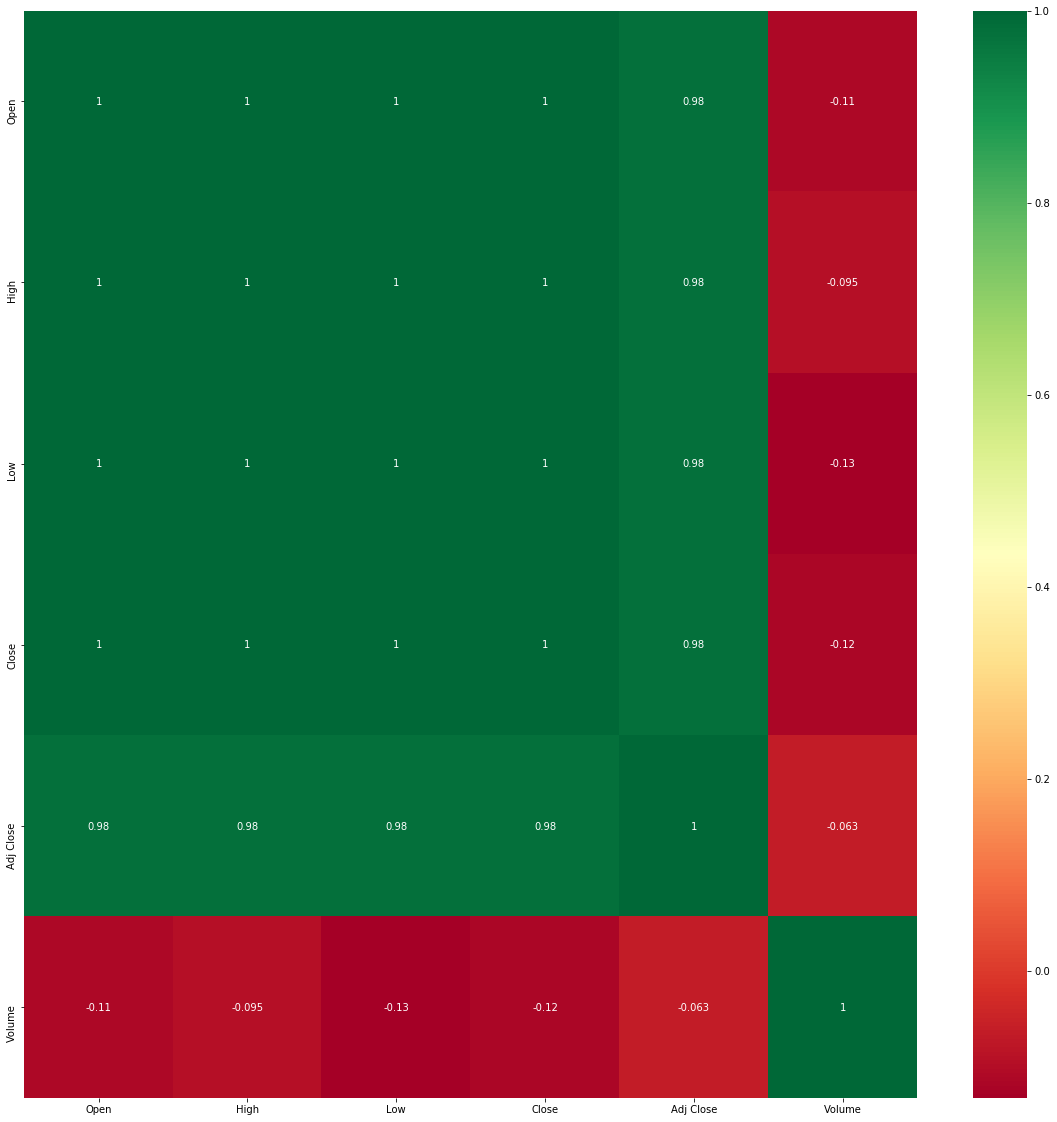

In [16]:
import seaborn as sns


X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Predict Stock Prices

### 1. Hierarchical Clustering with scikit-learn

In [37]:
data.shape

(1259, 7)

In [38]:
data = data.iloc[:, 3:5].values

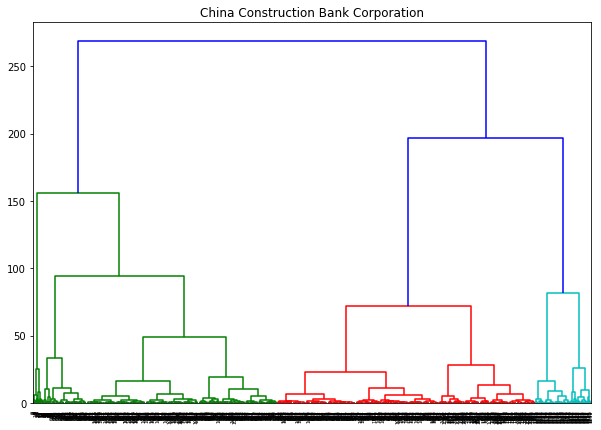

In [39]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("China Construction Bank Corporation")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In the script above we import the hierarchy class of the **scipy.cluster** library as **shc**. The hierarchy class has a 
**dendrogram** method which takes the value returned by the **linkage** method of the same class. The **linkage** method takes 
the dataset and the method to minimize distances as parameters. We use 'ward' as the **method** since it minimizes then 
variants of distances between the clusters

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. 
To do so we will again use the AgglomerativeClustering **class of the sklearn**.cluster library.

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

As a final step, let's plot the clusters to see how actually our data has been clustered:

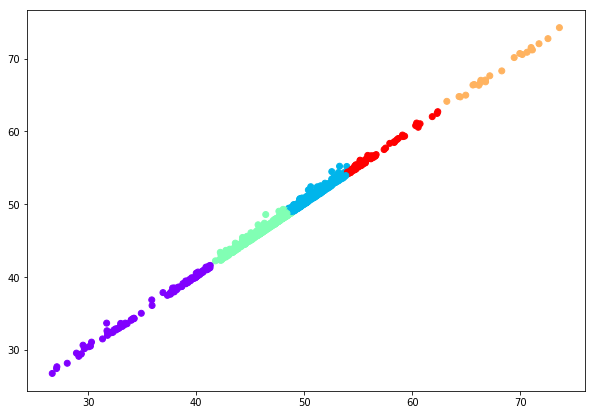

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

As we can see the data points in the form of five clusters.

### 2. Neural Network using TensorFlow

In [46]:
from sklearn.preprocessing import scale
from TFANN import ANNR
from google.colab import files

ImportError: Traceback (most recent call last):
  File "C:\Users\SABAdmin\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\SABAdmin\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\SABAdmin\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\SABAdmin\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\SABAdmin\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

NumPy will be used for our matrix operations, Matplotlib for graphs, sykit-learn for data processing, 
TFANN for the ML goodness, and google.colab files
will help us upload data from the local machine to the virtual environment


Now we need to import the data that we have already processed. To do this we will execute the following command, which will provide us with a window to upload the .csv file.

In [ ]:
files.upload()
!ls

In [ ]:
#reads data from the file and ceates a matrix with only the dates and the prices 
stock_data = np.loadtxt('CICHY.csv', delimiter=",", skiprows=1, usecols=(1, 4))

#scales the data to smaller values
stock_data=scale(stock_data)

#gets the price and dates from the matrix
prices = stock_data[:, 1].reshape(-1, 1)
dates = stock_data[:, 0].reshape(-1, 1)

#creates a plot of the data and then displays it
mpl.plot(dates[:, 0], prices[:, 0])
mpl.show(

Now, we need to construct the model. In this case we will use one input and output neuron 
(input date, output price) and will have three hidden layers of 25 
neurons each. Each layer will have an “tanh” activation function.

In [ ]:
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50

#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]

#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)

We have now initialized the model and are ready to train!

### Training the Model

In [ ]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)

#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Once the training is complete, we can execute the following commands to see how we did.

In [ ]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)

#Display the predicted reuslts agains the actual data
mpl.plot(dates, prices)
mpl.plot(dates, pricePredict, c='#5aa9ab')
mpl.show(